# Are women powerlifters in the IPF (International Powerlifting Federation) getting stronger?

## 1.0 Introduction
In 2018 I started powerlifting as a woman in the IPF and I partake in SBD. SBD is a three lift event, where each competitor gets three attempts in all three events - squat, bench and deadlift. In order to calculate your final score, you add the maximum number of kilos lifted in each event together. Throughout this project I will only look at the maximum lifted per event at each competition. In the data this is the TotalKg column.
<br />
<br />
Since I started, the amount of kilograms required, in SBD, has increased each year. This had led me to wonder if the women that I am competing against are getting stronger.
<br />
<br />
There are lots of different categories within the IPF, so I will limit myself to look at the data for women who compete in the "Open" category (aged 24-40) and only for SBD. I will also limit myself to those who compete without equiptment, or in the "Raw" category. I aim to find out if this specific group of women are
getting stronger.
<br />
<br />
Please note because of the size restrictions of the coursework, I developed this script using all of the data and then significantly manually deleted rows that were being filted out by the script.

## 1.1 Data Preperation
I start by importing python packages that I have used through out this project.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from  matplotlib import pyplot
%matplotlib inline
import seaborn as sns

# set defaults of any graphs displayed
sns.set(rc={'figure.figsize':(11,4)})

### 1.1 Obtaining The Data
I start the project by importing the OpenPowerlifting dataset. (https://www.openpowerlifting.org/data) This is in a much nicer format on Kaggle and this is actually where I downloaded the data from (https://www.kaggle.com/open-powerlifting/powerlifting-database)

### 1.2 Limitations Of The Data
I think it is important to note that the data available from this source only begins in 2012, we have no data before this time and thus cannot look at time periods before this point. As well as this, it appears that the data from 2019 is incomplete and we should be mindful of this when using teh data in the analysis.

### 1.3 Data Manipulation

This data set contains a lot of rows that are not applicable, because of the limitations that I set out in the introduction. I have manually deleted some data in excel so that the data fits the requirements of the coursework brief. However I will import the data and remove any unneccessary rows. This will make the dataset much smaller and far more manageable.

In [2]:
# This definition loads the data for us to do the analysis on.
def loadData(file_name="openpowerlifting.csv"):
    return pd.read_csv(file_name)


In [3]:
#This definition creates a dataframe that only contains the data that I called out in the introduction.
def Createdf():
    Data=loadData()
    
    # Condition 1: Female
    c1=Data['Sex']=='F' 
    # Condition 2: SBD
    c2=Data['Event']=='SBD'
    # Condition 3: Raw
    c3=Data['Equipment']=='Raw'
    # Condition 4: Open competitior - which is a categorgy based on age
    c4=np.logical_and(Data['Age']>=24, Data['Age']<40)
    # Condition 5: IPF competitor
    c5=Data['Federation']=='IPF'

    
    NewData=Data[c1&c2&c3&c4&c5]
    
    NewData=pd.DataFrame(NewData)

    return NewData
    

As well as removing rows, I also strip the data of unneccessary columns. For example, we have held a few columns constant- so they are no longer telling us anything extra about the data.
<br />
<br />
I also remove columns that I am not interested in. Because I am only looking at the maximum lifted in a competition, I only need to keep the columns that have data in for each event. Thus I don't need to have the breakdown of each squat, bench and deadlift attempt per person per competition.

In [16]:
def ColReduction(): 
    Data=Createdf()

    # I have removed columns that are either held constant because of the conditions imposed in the introduction or if the data is not used- we are taking max attempt- we don't need them all
    df=Data.drop(columns=['Sex', 'Event', 'Equipment', 'Federation','Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg'])
    
    # add simply the year of the meet
    df['Year']= pd.DatetimeIndex(df['Date']).year
    return df

Finally, I convert the columns into the correct format. Eg Date was an object but we have converted this to a DateTime.

In [17]:
def GetDataset():
    df=ColReduction()
    
    # we need to convert Date into a date
    df['Date']= pd.to_datetime(df['Date']) 
    return df

We now have a data set that we are happy with and can perform some analysis on.

In [18]:
GetDataset().head()

,Name,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Date,Year
1759,Joy Nnamani,26.5,24-34,Open,57.00,57,160.0,90.0,203.0,453.0,2019-01-27,2019
1760,RagnheiÃ°ur Kr. SigurÃ°ardÃ³ttir,37.5,35-39,Open,56.80,57,132.5,82.5,152.5,367.5,2019-01-27,2019
1763,KristÃ­n ÃžorsteinsdÃ³ttir Sonnentag,27.5,24-34,Open,83.50,84,117.5,75.0,180.0,372.5,2019-01-27,2019
1764,Rakel JÃ³nsdÃ³ttir,37.5,35-39,Open,79.75,84,142.5,62.5,130.0,335.0,2019-01-27,2019
1765,Bonica Brown,30.0,24-34,Open,131.45,84+,200.0,150.0,120.0,470.0,2019-01-27,2019


## 2.0 Data Analysis


## 2.1 Methodology- Useful Functions
This section contains fuctions that prove helpful in analysing the data. It contains fuctions that provide summary statistics and also those that plot graphs. The logic behind why these functions have been chosen will be explained in the results. <br /> <br /> The plotLine function plots the data points on a blue line and also a trend line as a red dotted line.

In [19]:
def plotLine(x,y):
    plt.plot(x, y)

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")

    return plt.show()

The InitialLook function produces a summary table of the TotalKgs lifted and also plot each point over time. This only takes into account the year that the competition was done in and not the actual date, as there was some noise in the data as a result.

In [20]:
def InitialLook(df):
    print( 'Figure 1')
    return plt.scatter(df['Year'], df['TotalKg']), df['TotalKg'].describe()

The MeanOverTime function plots the mean over time using the previously defined plotLine function. Similarly, the MedianOverTime function plots the median over time using the previously defined plotLine function.

In [21]:
def MeanOverTime(df):
    #Manipulate dataframe slightly to get the mean Total Kg per Year
    DateGroups= df.groupby('Year', as_index=False)['TotalKg'].mean()

    #Plot this on a graph
    x = DateGroups['Year']
    y = DateGroups['TotalKg']
    print ('Figure 2')
    return plotLine(x,y)

In [22]:
def MedianOverTime(df):
    #Manipulate dataframe slightly to get the median Total Kg per Year
    DateGroups= df.groupby('Year', as_index=False)['TotalKg'].median()
    
    #Plot graph over time
    x = DateGroups['Year']
    y = DateGroups['TotalKg']
    print ('Figure 3')
    return plotLine(x,y)

The TotalKgBoxPlot function produces a box plot of the TotalKgs lifted by each year.

In [23]:
def TotalKgBoxPlot(df):
    print ('Figure 4')
    ax = sns.boxplot(x=df["Year"], y=df["TotalKg"])
    return ax

## 2.2 Results
Let's begin by looking at the general distribution of the TotalKg data and some summary statistics around this.

Figure 1


(<matplotlib.collections.PathCollection at 0x1a6e869a608>, count    354.000000
 mean     389.468927
 std       75.405235
 min      145.000000
 25%      340.000000
 50%      385.000000
 75%      432.500000
 max      671.500000
 Name: TotalKg, dtype: float64)

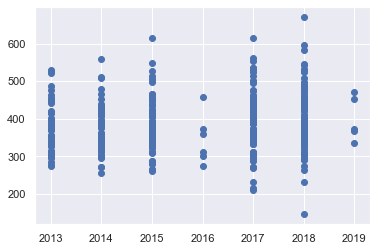

In [24]:
df=GetDataset()
InitialLook(df)

Before discussing the results, it should be explicitly called out that I am only looking at the year that the competition was conducted in and not the date itself. This is because over this timeframe there has been an increase in the number of competitions conducted globaly on non regular cadences. Thus reducing the date to just the year will hopefully remove any possible seasonal data patterns (in a crude way). <br /> <br />
I also want to call out that there appears to be not very many data points for 2019- which would imply that the 2019 data is incomplete and may be unrepresentative of the results of the total year. I have however kept it in the analyis, but we should be mindful of this.<br /><br />
Looking at the scatter plot first, we can see that it is pretty hard for the human eye to say whether or not women in the IPF are getting stronger. The data points are very clustered, making it very hard to tell what is going on. Further analysis is required. <br /> <br />
Now looking at the summary statistics, we can see that there are only 457 data points in our data. This means that since 2012, women have only lifted 457 times in SBD in the IPF. It should be noted that this is not a very large population size. <br /> <br/>
We can also note that the median is slighly smaller than the mean which would imply a slight right skew - meaning that there could be some outliers bringing the mean up. <br /> <br />
Despite the possibility of a skew, I think it is important to look at how the mean is acting. Figure 2 shows how the mean TotalKg lifted each year is tracking over time, depicted as the blue line.

Figure 2


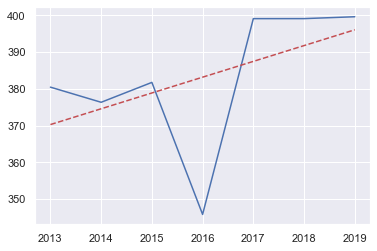

In [25]:
MeanOverTime(df)

The mean over time is quite volitile and has a range of over 20kg. Because of this volitility, I have added the red dotted line that shows the general trend of the data. As you can see the general trend line has a positive gradient and thus would imply that the mean TotalKg being lifted by women in the IPF is increasing over time. <br /> <br /> 

However, I have mentioned the possibility of a positive skew and I think that it is important that we address this. Figure 3 is similar to the graph we have just discussed, but instead of looking at the mean TotalKg over time, we are instead looking at the median TotalKg over time.

Figure 3


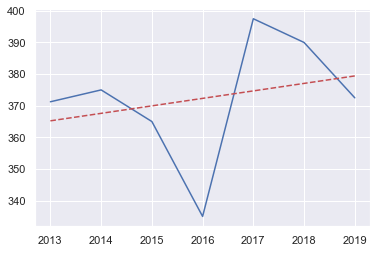

In [26]:
MedianOverTime(df)

While we see that the median over time is slightly more volitile than the mean, the more interesting thing here to note is the (red) trend line. We can see that the the trend line in Figure 3 also has a positive gradient, meaning that the median TotalKg over time is increasing. However on closer inspection we also see that this trend line is less steep than the trend line in Figure 2. Furthermore, the y axis on Figure 3 has smaller steps than the y axis in Figure 2, which further confirms that there is a smaller increase in the median TotalKg over time than the mean TotalKg over time. 

<br /> Finally, I want to visually confirm that there are outliers in the data that are bringing the mean up faster than the median. In order to do this we plot the box plot shown in Figure 4.

Figure 4


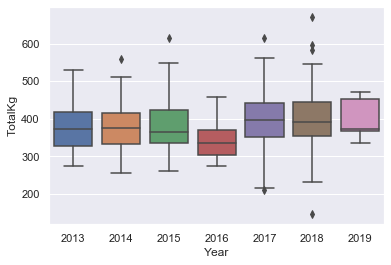

In [27]:
TotalKgBoxPlot(df)

As we hypothesised, we can see that in later years there are an increasing number of ouliers above the upper tails on the box plot. This would imply that there are an increasing number of events where a woman powerlifter has lifted heavier than 1.5*IQR+3rdQuartile.

## 2.3 Discussion

### 2.3.1 Limitations
The results of this study are not reflective of results of a wider population, namely they are only reflective of women who have competed in the IPF- they may not be extended to wider powerlifting groups or other genders without further analysis.
<br /><br /> The results from this analysis do not show how much women in the IPF are getting stronger. <br /> <br />This analysis only has data from 2012, trends before this time are not accounted for. 
### 2.3.2 Further Analysis
There may be some further interesting analysis to be done with this data. I think it would be interesting to look at each weight category and see if some weight categories are getting proportionally stronger than others. <br /> <br />It may also be interesting to compare if the increases in the TotalKg required to qualify for national competitions are proportional to the increases in TotalKg over time. <br /> <br />Furthermore, I think it could be interesting to see how different federations compare as this analysis was limited to IPF only.<br /><br /> The analysis done throughout this report is very elementary. It may be interesting to look at a wider range of statistics.<br /><br /> This analysis should be re run and findings updates once the 2019 data has been populated completely.


# 3.0 Conclusion
In response to the title we can conclude that from this analysis, it would appear that women competing in the IPF SBD competitions are getting stonger as the trends of both the mean and the median TotalKg over this timeframe have increased.

## 4.0 Appendix
In this section, I have included some extra analysis that I conducted, that I thought may be of interest to the reader.

While looking at Figure 2, I wondered what a rolling average would show. This can be seen in Figure 4.1. I have not included it in the main body of this analysis as I don't think it adds a huge amount- however I have included it in the appendix to satisfy any curious readers. 

Figure 4.1


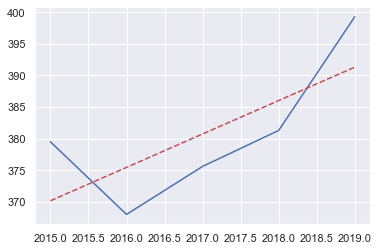

In [28]:
DateGroups= df.groupby('Year', as_index=False)['TotalKg'].mean()
for i in range(0,DateGroups.shape[0]-2):
        DateGroups.loc[DateGroups.index[i+2],'SMA_3'] = np.round(((DateGroups.iloc[i,1]+ DateGroups.iloc[i+1,1] +DateGroups.iloc[i+2,1])/3),1)

DateGroups2 = DateGroups[DateGroups['SMA_3'].notna()]
x = DateGroups2['Year']
y = DateGroups2['SMA_3']
plt.plot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print ('Figure 4.1')
plt.show()

In 2.3.2 I mentioned that it may be worth looking at the different weight categories in further detail. To satisfy my own curiosity, I plotted a box plot to see how TotalKg changes for each of the different women's weight categories in the IPF. This is shown as Figure 4.2. An interesting thing to note here is the lack of upper outliers.

Figure 4.2


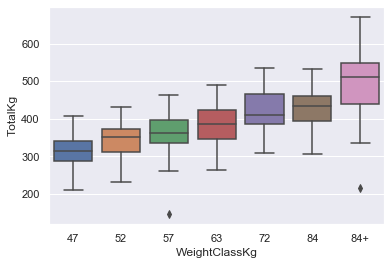

In [29]:
print ('Figure 4.2')
ax = sns.boxplot(x=df["WeightClassKg"], y=df["TotalKg"], order=['47','52','57','63','72','84', '84+'])

In [4]:
df=Createdf()

In [5]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Federation,Date
1759,Joy Nnamani,F,SBD,Raw,26.5,24-34,Open,57.00,57,145.0,...,87.5,90.0,90.0,-190.0,190.0,203.0,203.0,453.0,IPF,27/01/2019
1760,RagnheiÃ°ur Kr. SigurÃ°ardÃ³ttir,F,SBD,Raw,37.5,35-39,Open,56.80,57,NaN,...,80.0,82.5,82.5,145.0,-152.5,152.5,152.5,367.5,IPF,27/01/2019
1763,KristÃ­n ÃžorsteinsdÃ³ttir Sonnentag,F,SBD,Raw,27.5,24-34,Open,83.50,84,110.0,...,75.0,-80.0,75.0,180.0,-190.0,-195.0,180.0,372.5,IPF,27/01/2019
1764,Rakel JÃ³nsdÃ³ttir,F,SBD,Raw,37.5,35-39,Open,79.75,84,135.0,...,-67.5,-67.5,62.5,120.0,130.0,-140.0,130.0,335.0,IPF,27/01/2019
1765,Bonica Brown,F,SBD,Raw,30.0,24-34,Open,131.45,84+,170.0,...,150.0,-152.5,150.0,-112.5,120.0,-122.5,120.0,470.0,IPF,27/01/2019


In [6]:
df['Squat1Kg'].sum()

36850.0

In [ ]:
df